# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load Data Set

In [2]:
df = pd.read_csv(r'C:\Users\91771\Desktop\Innomatic\EDA\Webscraping\Project\pghostels.csv')

In [3]:
df.head()

,Unnamed: 0,Title,Location,Price,Room Info,Type,Places
0,0,N GRAND MEN'S PG/Paying Guest,in Kondapur,"#10,000 Onwards","Single Room #22,000 Twin Sharing #12,000 Tri...","Boys#10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Chirec International School 1.4 Km...
1,1,Sugathi Hometel PG/Paying Guest For Women,in Nanakaramguda,"#7,000 Onwards","Single Room #16,000 Twin Sharing #9,000 Trip...","Girls#7,000 OnwardsFood IncludedBeds Available...",0.9 Km from Isb (Indian School Of Business) 1....
2,2,MS Comforts Women's PG/Paying Guest,in Gachibowli,"#8,000 Onwards","Single Room #18,000 Twin Sharing #10,000 Tri...","Girls#8,000 OnwardsFood IncludedBeds Available...",0.3 Km from Asha Kiran 0.6 Km from Dlf Cyberci...
3,3,SKY LINE CO LIVING PG/Paying Guest,in Gachibowli,"#18,000 Onwards","Single Room With AC #30,000 Twin Sharing With...","Coed#18,000 OnwardsFood IncludedBeds Available...",0.9 Km from Isb (Indian School Of Business) 1....
4,4,Manjula Luxury PG/Paying Guest For MEN'S,in Gowlidoddy,"#8,000 Onwards","Single Room #18,000 Twin Sharing #10,000 Tri...","Boys#8,000 OnwardsFood IncludedBeds Available ...",1.6 Km from Isb (Indian School Of Business) 1....


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            980 non-null    object 
 1   Location        980 non-null    object 
 2   Single Room     945 non-null    float64
 3   Twin Sharing    980 non-null    int64  
 4   Triple Sharing  875 non-null    float64
 5   Four Sharing    455 non-null    float64
 6   Has AC          980 non-null    object 
 7   Nearest Metro   980 non-null    object 
 8   Metro Distance  980 non-null    float64
 9   Type            980 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 76.7+ KB


## Data Transformation

In [4]:
# Correcting Location Features
# Remove the word 'in ' from the Location column
df['Location'] = df['Location'].str.replace('in ', '')

### Define a function to extract prices, accounting for optional "With AC" text

In [5]:
def extract_price(room_info, room_type):
    pattern = re.compile(rf'{room_type}(?: With AC)? #([\d,]+)')
    match = pattern.search(room_info)
    return int(match.group(1).replace(',', '')) if match else None

# Define a function to check for AC in room info
def check_for_ac(room_info):
    return 'Yes' if 'With AC' in room_info else 'No'

# Apply the function to create new columns for prices
df['Single Room'] = df['Room Info'].apply(lambda x: extract_price(x, 'Single Room'))
df['Twin Sharing'] = df['Room Info'].apply(lambda x: extract_price(x, 'Twin Sharing'))
df['Triple Sharing'] = df['Room Info'].apply(lambda x: extract_price(x, 'Triple Sharing'))
df['Four Sharing'] = df['Room Info'].apply(lambda x: extract_price(x, 'Four Sharing'))

# Apply the function to create a new column for AC information
df['Has AC'] = df['Room Info'].apply(check_for_ac)



### Function to extract nearest metro and metro distance

In [6]:
def extract_metro_info(places_info):
    metro_match = re.search(r'(\d+.\d+ Km from [\w\s]+ Metro Station)', places_info)
    if metro_match:
        return metro_match.group(1).split(' from ')[1], metro_match.group(1).split(' Km ')[0] + ' Km'
    else:
        return None, None

In [7]:
# Create the 'Nearest Metro' and 'Metro Distance' columns
df[['Nearest Metro', 'Metro Distance']] = df['Places'].apply(lambda x: pd.Series(extract_metro_info(x)))

### Function to filter Type column and create Gender column

In [8]:

def filter_type_and_extract_gender(value):
    if 'Boys' in value:
        return 'Boys'
    elif 'Girls' in value:
        return 'Girls'
    elif 'Coed' in value:
        return 'Coed'
    else:
        return None

In [9]:
# Create the 'Gender' column and filter the Type column
df['Gender'] = df['Type'].apply(filter_type_and_extract_gender)
df['Type'] = df['Gender']

In [10]:
# Drop the specified columns
df.drop(columns=['Unnamed: 0', 'Price', 'Type', 'Places','Room Info'], inplace=True)

# EDA On PG Data Set

## 1 Data Exploration

In [11]:
df.head(3)

,Title,Location,Single Room,Twin Sharing,Triple Sharing,Four Sharing,Has AC,Nearest Metro,Metro Distance,Gender
0,N GRAND MEN'S PG/Paying Guest,Kondapur,22000.0,12000,10000.0,NaN,No,Raidurg Metro Station,3.3 Km,Boys
1,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,16000.0,9000,8500.0,7000.0,No,Raidurg Metro Station,4.8 Km,Girls
2,MS Comforts Women's PG/Paying Guest,Gachibowli,18000.0,10000,9000.0,8000.0,No,Raidurg Metro Station,3.0 Km,Girls


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           980 non-null    object 
 1   Location        980 non-null    object 
 2   Single Room     945 non-null    float64
 3   Twin Sharing    980 non-null    int64  
 4   Triple Sharing  875 non-null    float64
 5   Four Sharing    455 non-null    float64
 6   Has AC          980 non-null    object 
 7   Nearest Metro   980 non-null    object 
 8   Metro Distance  980 non-null    object 
 9   Gender          980 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 76.7+ KB


In [13]:
df.isnull().sum()

Title               0
Location            0
Single Room        35
Twin Sharing        0
Triple Sharing    105
Four Sharing      525
Has AC              0
Nearest Metro       0
Metro Distance      0
Gender              0
dtype: int64

In [14]:
df.columns

Index(['Title', 'Location', 'Single Room', 'Twin Sharing', 'Triple Sharing',
       'Four Sharing', 'Has AC', 'Nearest Metro', 'Metro Distance', 'Gender'],
      dtype='object')

## 2. Data Cleaning

### a) Missing Value

In [15]:
df.isnull().sum()

Title               0
Location            0
Single Room        35
Twin Sharing        0
Triple Sharing    105
Four Sharing      525
Has AC              0
Nearest Metro       0
Metro Distance      0
Gender              0
dtype: int64

In [16]:
# TreatMent Using Domain Knowledge
df.fillna("0",inplace = True)

In [17]:
# Convert columns to numeric, coerce errors to NaN, and fill NaN with 0
df['Single Room'] = pd.to_numeric(df['Single Room'], errors='coerce').fillna(0).astype(np.int64)
df['Triple Sharing'] = pd.to_numeric(df['Triple Sharing'], errors='coerce').fillna(0).astype(np.int64)
df['Four Sharing'] = pd.to_numeric(df['Four Sharing'], errors='coerce').fillna(0).astype(np.int64)

print(df.dtypes)
print(df)

Title             object
Location          object
Single Room        int64
Twin Sharing       int64
Triple Sharing     int64
Four Sharing       int64
Has AC            object
Nearest Metro     object
Metro Distance    object
Gender            object
dtype: object
                                         Title       Location  Single Room  \
0                N GRAND MEN'S PG/Paying Guest       Kondapur        22000   
1    Sugathi Hometel PG/Paying Guest For Women  Nanakaramguda        16000   
2          MS Comforts Women's PG/Paying Guest     Gachibowli        18000   
3           SKY LINE CO LIVING PG/Paying Guest     Gachibowli        30000   
4     Manjula Luxury PG/Paying Guest For MEN'S     Gowlidoddy        18000   
..                                         ...            ...          ...   
975     My Spaces Luxury Men's PG/Paying Guest       Kondapur        22000   
976      Estay Executive Men's PG/Paying Guest    Hitech City        22000   
977     R3 ATMOS LIVE THE SWAG PG/

### b) Outlier

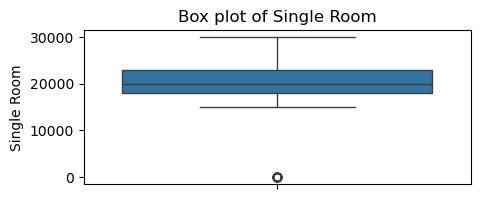

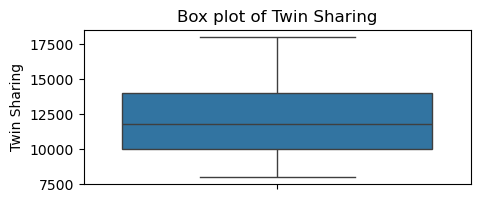

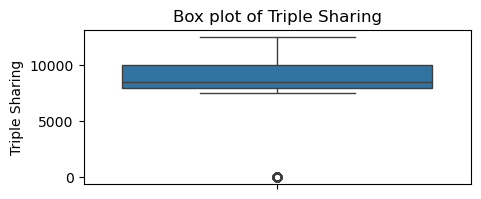

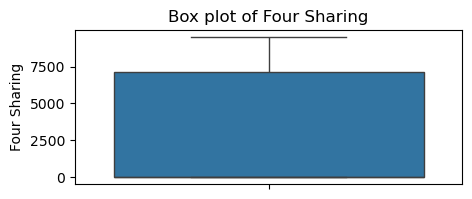

In [18]:
# Using Box Plot
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(5, 2))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

### c). Duplicate
**Explanation**
**Multiple Listings of the Same PG:**
- Reason: A single PG accommodation might be listed multiple times across various platforms or by different users. Each listing could provide unique attributes such as price variations, room availability, or promotional offers.
- Example: A PG named "Comfort Stay" might be listed with different prices or room types (single room, double sharing, etc.).
- Usage: Retaining these duplicates helps in analyzing price trends, room preferences, and availability.

**Proximity to Multiple Metro Stations:**
- Reason: A PG accommodation might be located near more than one metro station, making it accessible from different routes.
- Example: A PG near both "Central Metro" and "Park Street Metro" could have listings showing proximity to either station.
- Usage: Keeping these duplicates is crucial for users who prioritize accessibility and wish to choose accommodations based on their daily commute routes.



### d). Structural Error

In [20]:
df.head(2)

,Title,Location,Single Room,Twin Sharing,Triple Sharing,Four Sharing,Has AC,Nearest Metro,Metro Distance,Gender
0,N GRAND MEN'S PG/Paying Guest,Kondapur,22000,12000,10000,0,No,Raidurg Metro Station,3.3 Km,Boys
1,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,16000,9000,8500,7000,No,Raidurg Metro Station,4.8 Km,Girls


In [21]:
df.rename(columns={'Title': 'Name', 'Gender': 'Type'}, inplace=True)

In [22]:
df.head(2)

,Name,Location,Single Room,Twin Sharing,Triple Sharing,Four Sharing,Has AC,Nearest Metro,Metro Distance,Type
0,N GRAND MEN'S PG/Paying Guest,Kondapur,22000,12000,10000,0,No,Raidurg Metro Station,3.3 Km,Boys
1,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,16000,9000,8500,7000,No,Raidurg Metro Station,4.8 Km,Girls


### Now Check Per Column 

In [23]:
df['Name']

0                  N GRAND MEN'S PG/Paying Guest
1      Sugathi Hometel PG/Paying Guest For Women
2            MS Comforts Women's PG/Paying Guest
3             SKY LINE CO LIVING PG/Paying Guest
4       Manjula Luxury PG/Paying Guest For MEN'S
                         ...                    
975       My Spaces Luxury Men's PG/Paying Guest
976        Estay Executive Men's PG/Paying Guest
977       R3 ATMOS LIVE THE SWAG PG/Paying Guest
978          SVS Co living Stays PG/Paying Guest
979        Sasya Elite Co-Living PG/Paying Guest
Name: Name, Length: 980, dtype: object

In [24]:
df['Location']

0           Kondapur
1      Nanakaramguda
2         Gachibowli
3         Gachibowli
4         Gowlidoddy
           ...      
975         Kondapur
976      Hitech City
977       Hitex Road
978         Kondapur
979       Gachibowli
Name: Location, Length: 980, dtype: object

In [25]:
df['Single Room']

0      22000
1      16000
2      18000
3      30000
4      18000
       ...  
975    22000
976    22000
977    28000
978    18000
979    22500
Name: Single Room, Length: 980, dtype: int64

In [26]:
df['Twin Sharing']

0      12000
1       9000
2      10000
3      18000
4      10000
       ...  
975    12000
976    11500
977    15000
978    11000
979    12500
Name: Twin Sharing, Length: 980, dtype: int64

In [27]:
df['Triple Sharing']

0      10000
1       8500
2       9000
3          0
4       8000
       ...  
975     9500
976     8500
977    11000
978     9000
979        0
Name: Triple Sharing, Length: 980, dtype: int64

In [28]:
df['Four Sharing']

0         0
1      7000
2      8000
3         0
4         0
       ... 
975       0
976    7500
977       0
978       0
979       0
Name: Four Sharing, Length: 980, dtype: int64

In [29]:
df['Has AC']

0       No
1       No
2       No
3      Yes
4       No
      ... 
975     No
976    Yes
977    Yes
978    Yes
979    Yes
Name: Has AC, Length: 980, dtype: object

In [30]:
df['Nearest Metro']

0          Raidurg Metro Station
1          Raidurg Metro Station
2          Raidurg Metro Station
3          Raidurg Metro Station
4          Raidurg Metro Station
                 ...            
975        Miyapur Metro Station
976    Hitech City Metro Station
977         Hitech Metro Station
978        Miyapur Metro Station
979        Raidurg Metro Station
Name: Nearest Metro, Length: 980, dtype: object

In [31]:
df['Metro Distance']

0      3.3 Km
1      4.8 Km
2      3.0 Km
3      4.0 Km
4      5.5 Km
        ...  
975    2.6 Km
976    0.4 Km
977    1.7 Km
978    2.9 Km
979    2.3 Km
Name: Metro Distance, Length: 980, dtype: object

In [32]:
df['Type']

0       Boys
1      Girls
2      Girls
3       Coed
4       Boys
       ...  
975     Boys
976     Boys
977     Coed
978     Coed
979     Coed
Name: Type, Length: 980, dtype: object

In [ ]:
#df.to_csv('Cleaned_Data.csv')

In [33]:
df = pd.read_csv(r"C:\Users\91771\Desktop\Innomatic\EDA\Webscraping\Project\Cleaned_Data.csv")

In [34]:
df.head(2)

,Unnamed: 0,Name,Location,Single Room,Twin Sharing,Triple Sharing,Four Sharing,Has AC,Nearest Metro,Metro Distance,Type
0,0,N GRAND MEN'S PG/Paying Guest,Kondapur,22000,12000,10000,Not Available,No,Raidurg Metro Station,3.3,Boys
1,1,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,16000,9000,8500,7000,No,Raidurg Metro Station,4.8,Girls


In [35]:
df.drop(columns=['Unnamed: 0'], inplace=True)

## 3. Data Manipulation

### (1) Filter PGs with Twin Sharing price less than 10,000

In [36]:
pg_twin_sharing_less_10000 = df[df['Twin Sharing'] < 10000]
pg_twin_sharing_less_10000[['Name', 'Location', 'Twin Sharing']]

,Name,Location,Twin Sharing
1,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000
10,ASHOK REDDY PG/Paying Guest FOR MEN,Kondapur,9000
11,SV VIHANG CO LIVING PG/Paying Guest,TNGOS Colony,8000
29,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000
38,ASHOK REDDY PG/Paying Guest FOR MEN,Kondapur,9000
...,...,...,...
934,ASHOK REDDY PG/Paying Guest FOR MEN,Kondapur,9000
935,SV VIHANG CO LIVING PG/Paying Guest,TNGOS Colony,8000
953,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000
962,ASHOK REDDY PG/Paying Guest FOR MEN,Kondapur,9000


### (2) Filter PGs that offer Triple Sharing and have AC

In [37]:
pg_triple_sharing_ac = df[(df['Triple Sharing'] != 'Not Available') & (df['Has AC'] == 'Yes')]
pg_triple_sharing_ac[['Name', 'Location', 'Triple Sharing', 'Has AC']]

,Name,Location,Triple Sharing,Has AC
5,SVS Co living Stays PG/Paying Guest,Kondapur,10000,Yes
6,TULASI PREMIUM CO LIVING AND GUEST ROOMS PG/Pa...,Kondapur,12000,Yes
12,TECHIES ELITE CO-LIVING PG/Paying Guest,"Hafeezpet, NH 9",12500,Yes
16,COZY EXECUTIVE WOMEN'S PG/Paying Guest,Gachibowli,8500,Yes
19,Le bestow coliving - Bhuvan PG/Paying Guest,Kondapur,12000,Yes
...,...,...,...,...
971,Le bestow coliving - Bhuvan PG/Paying Guest,Kondapur,12000,Yes
973,RRR COMFORT STAY WOMENS separate building MENS...,Gachibowli,8500,Yes
976,Estay Executive Men's PG/Paying Guest,Hitech City,8500,Yes
977,R3 ATMOS LIVE THE SWAG PG/Paying Guest,Hitex Road,11000,Yes


### (3) Filter PGs that offer Four Sharing and do not have AC

In [39]:
pg_four_sharing_no_ac = df[(df['Four Sharing'] != 'Not Available') & (df['Has AC'] == 'No')]
pg_four_sharing_no_ac[['Name', 'Location', 'Four Sharing', 'Has AC']]

,Name,Location,Four Sharing,Has AC
1,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,7000,No
2,MS Comforts Women's PG/Paying Guest,Gachibowli,8000,No
7,Unique Women's PG/Paying Guest,Gachibowli,9000,No
8,GOPI MEN'S PG/Paying Guest,Kondapur,7000,No
10,ASHOK REDDY PG/Paying Guest FOR MEN,Kondapur,6499,No
...,...,...,...,...
962,ASHOK REDDY PG/Paying Guest FOR MEN,Kondapur,6499,No
966,Eswar Grand Man's and Women's PG/Paying Guest,Anjaiah Nagar Gachibowli,6500,No
967,SRIKARA MENS PG/Paying Guest AND HOSTEL,Madhapur,7500,No
970,Laxmi Kalavathi Grand Mens PG/Paying Guest and...,Gachibowli,7000,No


### (4) Filter PGs with Metro Distance less than 4 km

In [40]:
pg_metro_distance_less_4km = df[df['Metro Distance'] < 4]
pg_metro_distance_less_4km[['Name', 'Location', 'Metro Distance']]

,Name,Location,Metro Distance
0,N GRAND MEN'S PG/Paying Guest,Kondapur,3.3
2,MS Comforts Women's PG/Paying Guest,Gachibowli,3.0
5,SVS Co living Stays PG/Paying Guest,Kondapur,3.3
6,TULASI PREMIUM CO LIVING AND GUEST ROOMS PG/Pa...,Kondapur,2.5
7,Unique Women's PG/Paying Guest,Gachibowli,1.6
...,...,...,...
975,My Spaces Luxury Men's PG/Paying Guest,Kondapur,2.6
976,Estay Executive Men's PG/Paying Guest,Hitech City,0.4
977,R3 ATMOS LIVE THE SWAG PG/Paying Guest,Hitex Road,1.7
978,SVS Co living Stays PG/Paying Guest,Kondapur,2.9


### (5) Filter PGs for girls with Twin Sharing price of 9,000 or less

In [41]:
pg_girls_twin_sharing_9000_or_less = df[(df['Type'] == 'Girls') & (df['Twin Sharing'] <= 9000)]
pg_girls_twin_sharing_9000_or_less[['Name', 'Location', 'Twin Sharing']]

,Name,Location,Twin Sharing
1,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000
29,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000
57,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000
85,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000
113,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000
141,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000
169,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000
197,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000
225,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000
253,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,9000


### (6) Filter PGs in Kondapur

In [42]:
pg_kondapur = df[df['Location'] == 'Kondapur']
pg_kondapur[['Name', 'Single Room', 'Twin Sharing', 'Triple Sharing', 'Four Sharing']]

,Name,Single Room,Twin Sharing,Triple Sharing,Four Sharing
0,N GRAND MEN'S PG/Paying Guest,22000,12000,10000,Not Available
5,SVS Co living Stays PG/Paying Guest,20000,12000,10000,Not Available
6,TULASI PREMIUM CO LIVING AND GUEST ROOMS PG/Pa...,26000,16000,12000,Not Available
8,GOPI MEN'S PG/Paying Guest,20000,10000,8000,7000
9,SRI RAMA CO-LIVING PG/Paying Guest,19000,11000,8000,Not Available
...,...,...,...,...,...
961,SRI RAMA CO-LIVING PG/Paying Guest,19000,11000,8000,Not Available
962,ASHOK REDDY PG/Paying Guest FOR MEN,Not Available,9000,7499,6499
971,Le bestow coliving - Bhuvan PG/Paying Guest,20000,15000,12000,Not Available
975,My Spaces Luxury Men's PG/Paying Guest,22000,12000,9500,Not Available


### (7) Filter coed PGs with Twin Sharing price less than 15,000

In [43]:
pg_coed_twin_sharing_less_15000 = df[(df['Type'] == 'Coed') & (df['Twin Sharing'] < 15000)]
pg_coed_twin_sharing_less_15000[['Name', 'Location', 'Twin Sharing']]

,Name,Location,Twin Sharing
5,SVS Co living Stays PG/Paying Guest,Kondapur,12000
9,SRI RAMA CO-LIVING PG/Paying Guest,Kondapur,11000
11,SV VIHANG CO LIVING PG/Paying Guest,TNGOS Colony,8000
13,Trinity Co-Living PG/Paying Guest,Madhapur,14000
14,Eswar Grand Man's and Women's PG/Paying Guest,Anjaiah Nagar Gachibowli,10000
...,...,...,...
970,Laxmi Kalavathi Grand Mens PG/Paying Guest and...,Gachibowli,10000
972,Orion Co-Living PG/Paying Guest,Madhapur,14000
973,RRR COMFORT STAY WOMENS separate building MENS...,Gachibowli,12500
978,SVS Co living Stays PG/Paying Guest,Kondapur,11000


### (8) Filter PGs with nearest metro station 'Raidurg Metro Station' and offer Triple Sharing

In [44]:
pg_raidurg_triple_sharing = df[(df['Nearest Metro'] == 'Raidurg Metro Station') & (df['Triple Sharing'] != 'Not Available')]
pg_raidurg_triple_sharing[['Name', 'Location', 'Triple Sharing']]

,Name,Location,Triple Sharing
0,N GRAND MEN'S PG/Paying Guest,Kondapur,10000
1,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,8500
2,MS Comforts Women's PG/Paying Guest,Gachibowli,9000
4,Manjula Luxury PG/Paying Guest For MEN'S,Gowlidoddy,8000
7,Unique Women's PG/Paying Guest,Gachibowli,10000
...,...,...,...
966,Eswar Grand Man's and Women's PG/Paying Guest,Anjaiah Nagar Gachibowli,8000
968,COZY EXECUTIVE WOMEN'S PG/Paying Guest,Gachibowli,8500
969,TechNest Coliving PG/Paying Guest,Hitech City,10000
970,Laxmi Kalavathi Grand Mens PG/Paying Guest and...,Gachibowli,8000


### (9) Find the average price for each room type (Single Room, Twin Sharing, Triple Sharing, Four Sharing) in the dataset.

In [45]:
# Ensure room price columns are numeric
df['Single Room'] = pd.to_numeric(df['Single Room'], errors='coerce')
df['Twin Sharing'] = pd.to_numeric(df['Twin Sharing'], errors='coerce')
df['Triple Sharing'] = pd.to_numeric(df['Triple Sharing'], errors='coerce')
df['Four Sharing'] = pd.to_numeric(df['Four Sharing'], errors='coerce')

# Calculate the average prices for each room type
average_prices = df[['Single Room', 'Twin Sharing', 'Triple Sharing', 'Four Sharing']].mean()
average_prices

Single Room       20907.407407
Twin Sharing      12053.571429
Triple Sharing     9299.960000
Four Sharing       7538.384615
dtype: float64

## 4. Data Visualization

### a) Univariate Analysis 

1. Find all PGs with a Twin Sharing price less than 10,000.

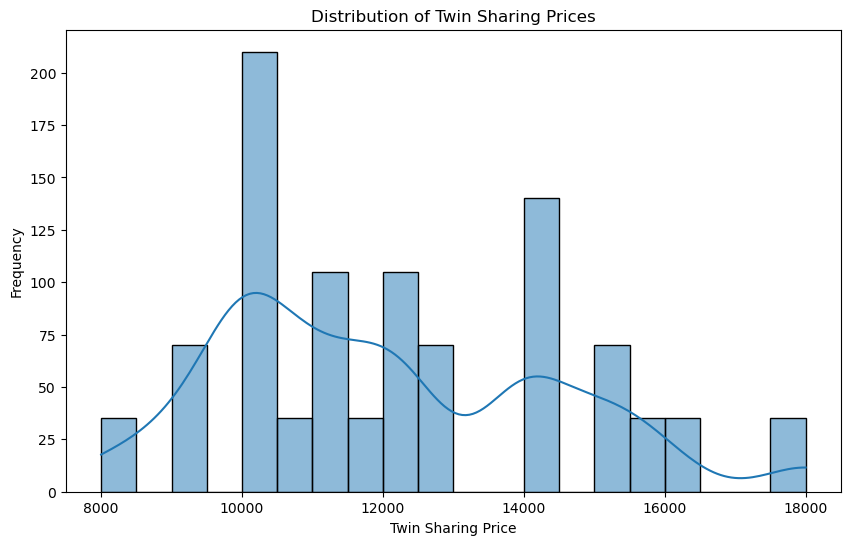

In [47]:
# Plot distribution of Twin Sharing prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Twin Sharing'].dropna(), bins=20, kde=True)
plt.title('Distribution of Twin Sharing Prices')
plt.xlabel('Twin Sharing Price')
plt.ylabel('Frequency')
plt.show()

2. Find the average price for each room type (Single Room, Twin Sharing, Triple Sharing, Four Sharing) in the dataset.

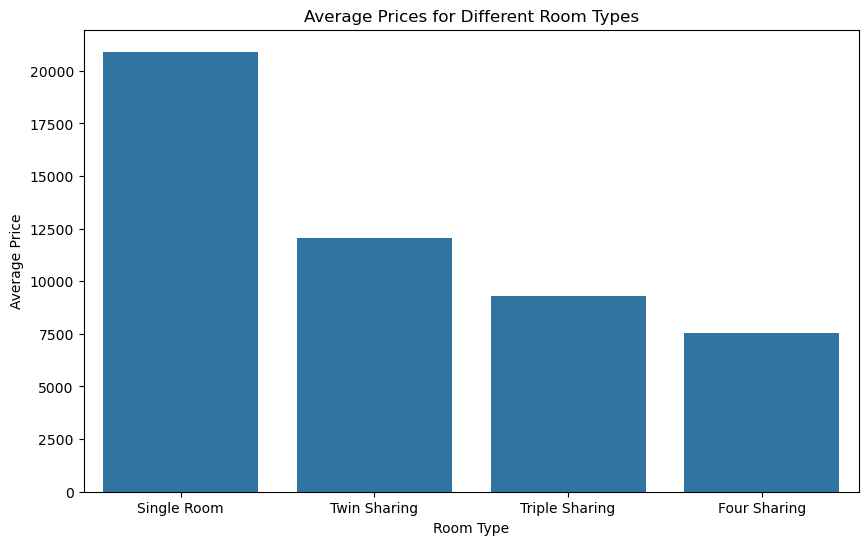

In [58]:
# Plot average prices for each room type
plt.figure(figsize=(10, 6))
sns.barplot(x=average_prices.index, y=average_prices.values)
plt.title('Average Prices for Different Room Types')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

3. Find the number of PG By Type

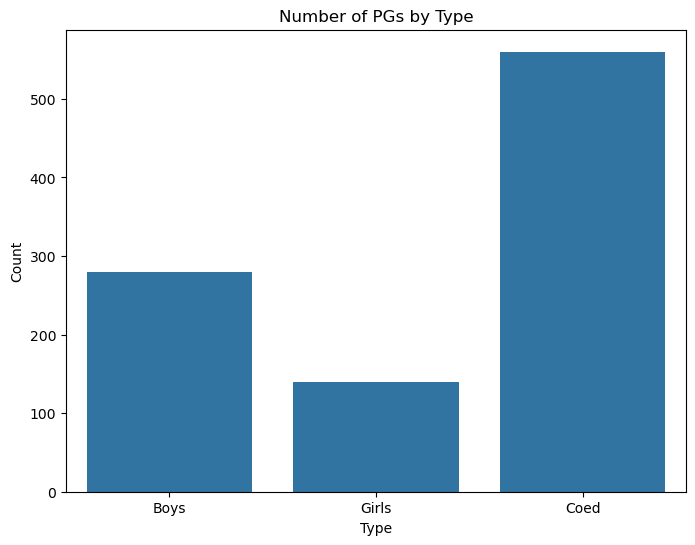

In [48]:
# Plot count of PGs by type
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.title('Number of PGs by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### b) Bi-Variate

1. Identify PGs that offer Triple Sharing and Four Sharing have AC.

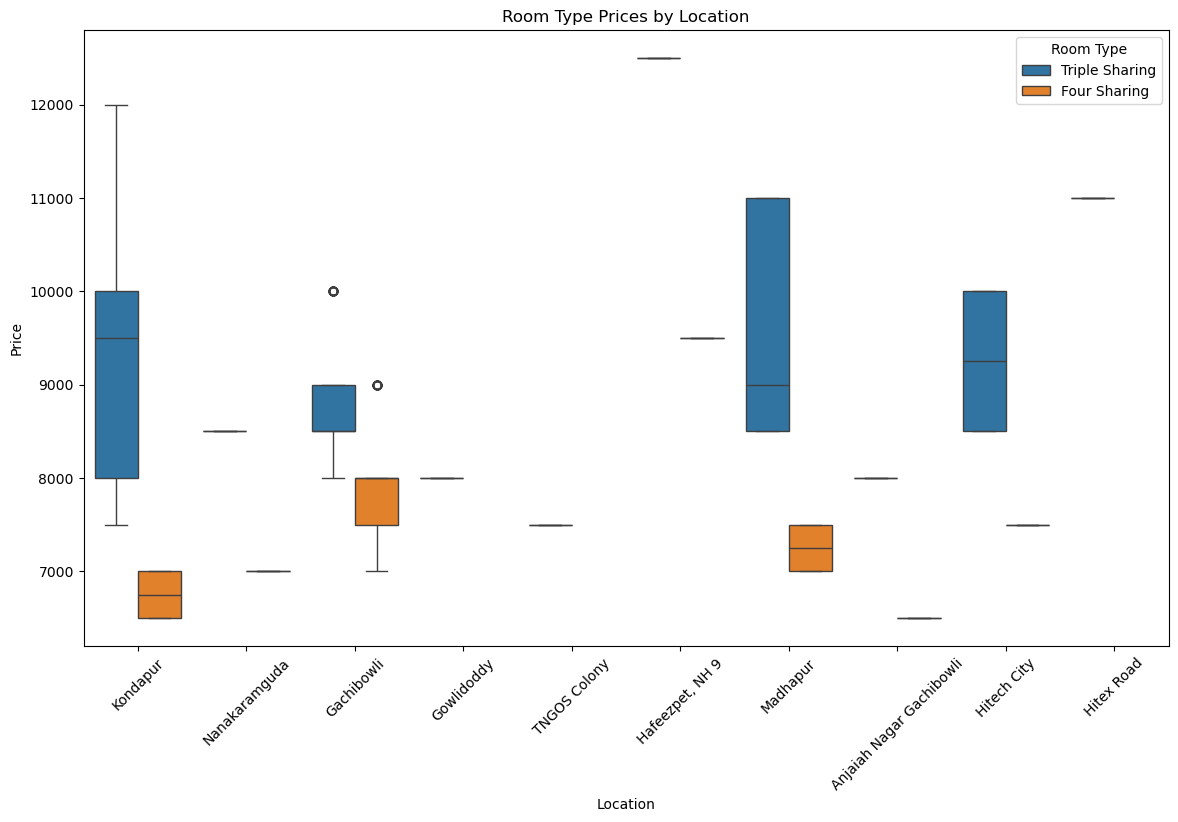

In [49]:
# Melt the data to plot prices by location
melted_data = df.melt(id_vars=['Name', 'Location'], value_vars=[ 'Triple Sharing', 'Four Sharing'],
                      var_name='Room Type', value_name='Price')

# Plot room type prices by location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Price', hue='Room Type', data=melted_data)
plt.title('Room Type Prices by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

2. Find PGs for girls that offer Twin Sharing at a price of 9,000 or less.

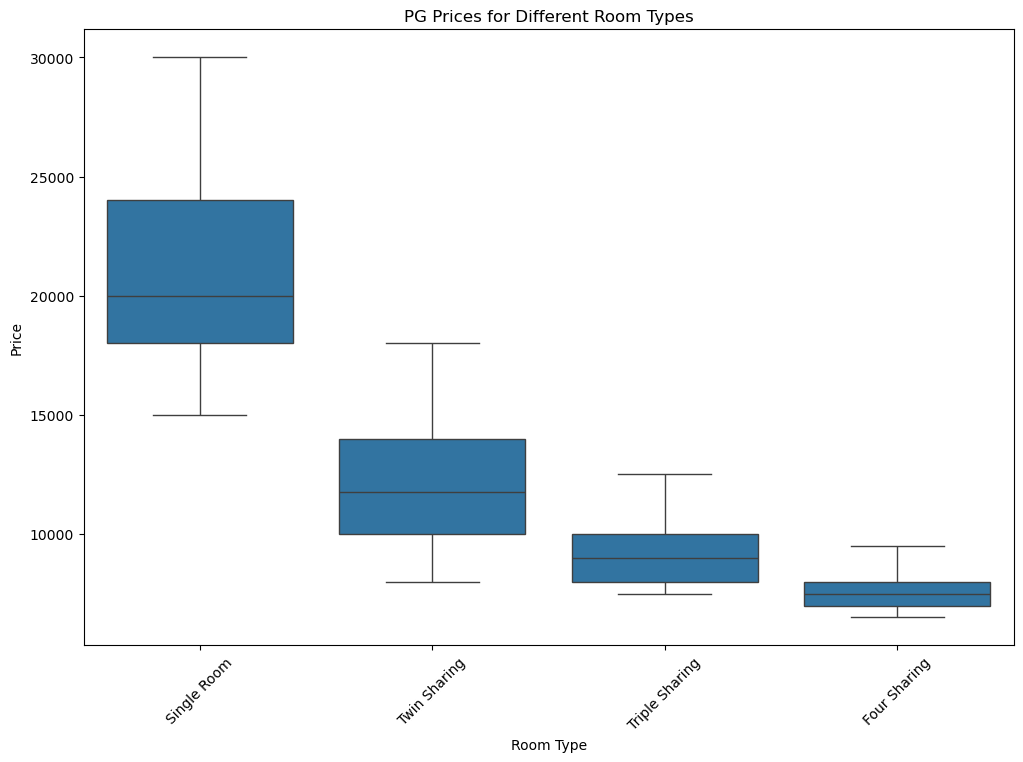

In [51]:
# Melt the data to plot prices by room type
melted_data = df.melt(id_vars=['Name', 'Location'],
                      value_vars=['Single Room', 'Twin Sharing', 'Triple Sharing', 'Four Sharing'],
                      var_name='Room Type', value_name='Price')

# Drop rows with NaN values in the 'Price' column
melted_data = melted_data.dropna(subset=['Price'])

# Plot room type prices
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_data, x='Room Type', y='Price')
plt.title('PG Prices for Different Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

3. Filter PGs in Kondapur

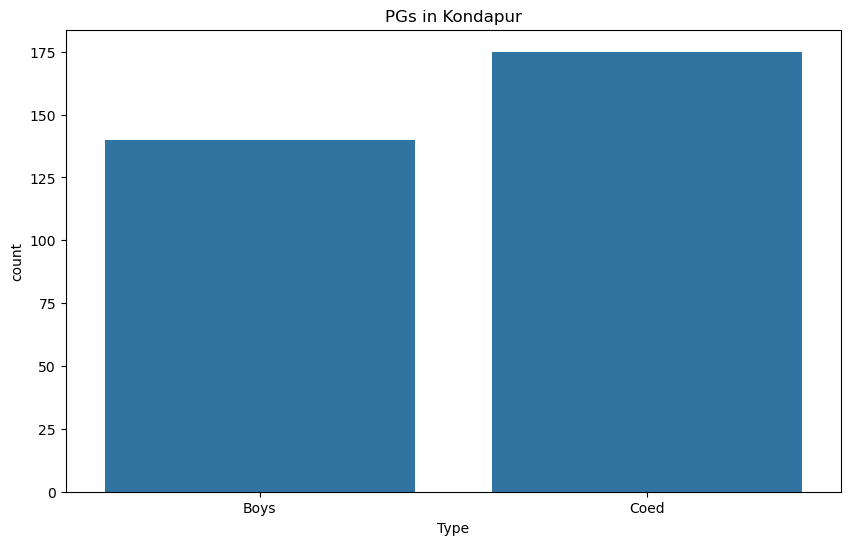

In [52]:
# Visualization for PGs in Kondapur
pgs_kondapur = df[df['Location'] == 'Kondapur']
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=pgs_kondapur)
plt.title('PGs in Kondapur')
plt.show()

### c) Multi-Variate

C:\Users\91771\AppData\Local\Temp\ipykernel_4372\2200690646.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


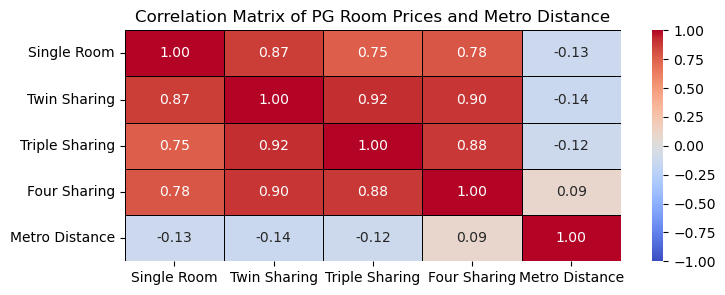

In [57]:
df['Single Room'] = pd.to_numeric(df['Single Room'], errors='coerce')
df['Twin Sharing'] = pd.to_numeric(df['Twin Sharing'], errors='coerce')
df['Triple Sharing'] = pd.to_numeric(df['Triple Sharing'], errors='coerce')
df['Four Sharing'] = pd.to_numeric(df['Four Sharing'], errors='coerce')
df['Metro Distance'] = pd.to_numeric(df['Metro Distance'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 3))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

# Title and display the heatmap
plt.title('Correlation Matrix of PG Room Prices and Metro Distance')
plt.show()